In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [16]:
file_name_aal = "../../neurolib/data/datasets/aal/atlas/AAL2.nii"
img_aal = nib.load(file_name_aal)
data_aal = img_aal.get_fdata()

lower = img_aal.affine @ [0,0,0,1]
print(lower)
upper = img_aal.affine @ np.hstack((90, 108, 90, 1))
print(upper)

[  90. -126.  -72.    1.]
[-90.  90. 108.   1.]


In [14]:
def plot_into_aal_space(data, view="yz", lower=lower, upper=upper):
    """ data points in MNI mm!
    """

    plt.figure(figsize=(5,5))
    plt.plot(data)

    if view == "xy": # horizontal
        plt.xlim(lower[0], upper[0])
        plt.ylim(lower[1], upper[1])
        plt.xlabel("x MNI [mm]")
        plt.ylabel("y MNI [mm]")
    elif view == "yz":  # saggital
        plt.xlim(lower[1], upper[1])
        plt.ylim(lower[2], upper[2])
        plt.xlabel("y MNI [mm]")
        plt.ylabel("z MNI [mm]")
    elif view =="xz":  # coronar
        plt.xlim(lower[0], upper[0])
        plt.ylim(lower[2], upper[2])
        plt.xlabel("x MNI [mm]")
        plt.ylabel("z MNI [mm]")

def imshow_into_aal_space(data, view="yz", lower=lower, upper=upper):
    """ data points in MNI mm!
    """

    plt.figure(figsize=(5,5))
    plt.imshow(data.T, cmap="gray", origin="lower")

    # (91, 109, 91)
    ticks_upper = (90, 108, 90)

    if view == "xy": # horizontal
        plt.xticks(np.arange(0, ticks_upper[0], 1),
                   np.arange(lower[0], upper[0], -2))

        plt.yticks(np.arange(0, ticks_upper[1], 1),
                   np.arange(lower[1], upper[1], 2))

        plt.xlabel("x MNI [mm]")
        plt.ylabel("y MNI [mm]")
    elif view == "yz":  # saggital
        plt.yticks(np.arange(0, ticks_upper[1], 1),
                   np.arange(lower[1], upper[1], 2))
        plt.yticks(np.arange(0, ticks_upper[2], 1),
                   np.arange(lower[2], upper[2], 2))
        plt.xlabel("y MNI [mm]")
        plt.ylabel("z MNI [mm]")
    elif view =="xz":  # coronar
        plt.xticks(np.arange(0, ticks_upper[0], 1),
                   np.arange(lower[0], upper[0], -2))
        plt.yticks(np.arange(0, ticks_upper[2], 1),
                   np.arange(lower[2], upper[2], 2))
        plt.xlabel("x MNI [mm]")
        plt.ylabel("z MNI [mm]")

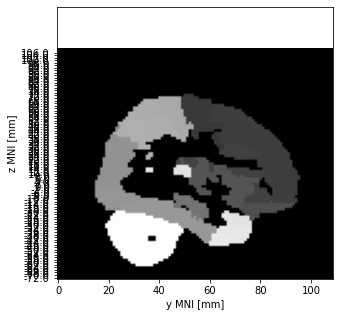

In [15]:
imshow_into_aal_space(data_aal[26, :, :])

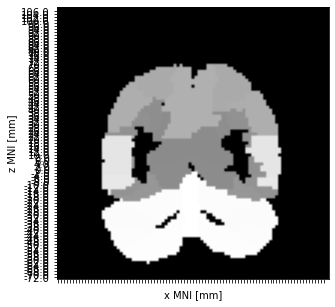

In [17]:
imshow_into_aal_space(data_aal[:, 30, :], view="xz")